## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

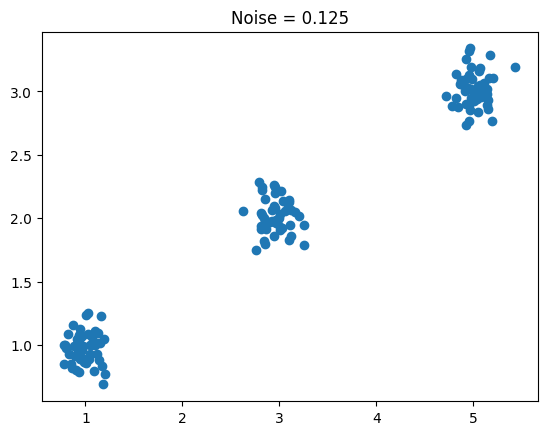

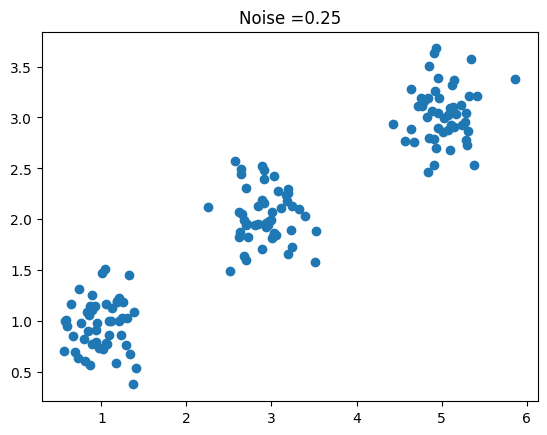

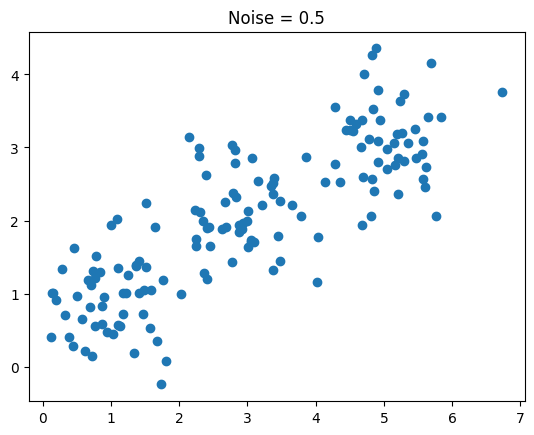

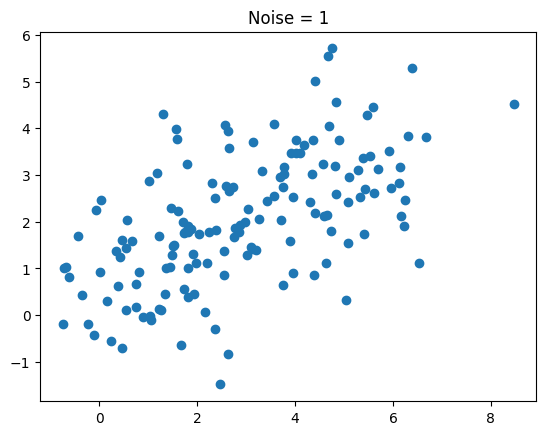

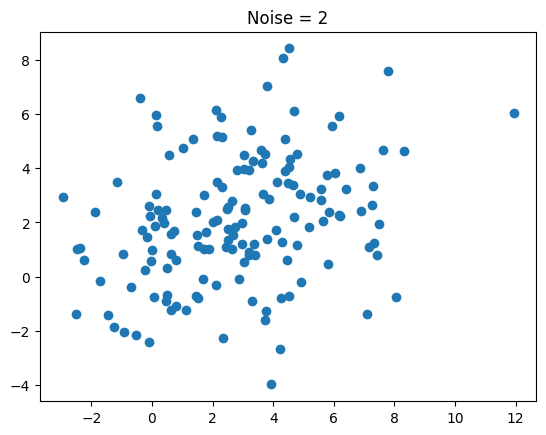

In [23]:
plt.scatter(df0_125['x1'],df0_125['x2'])
plt.title('Noise = 0.125')
plt.show()

plt.scatter(df0_25['x1'],df0_25['x2'])
plt.title('Noise =0.25')
plt.show()

plt.scatter(df0_5['x1'],df0_5['x2'])
plt.title('Noise = 0.5')
plt.show()

plt.scatter(df1_0['x1'],df1_0['x2'])
plt.title('Noise = 1')
plt.show()

plt.scatter(df2_0['x1'],df2_0['x2'])
plt.title('Noise = 2')
plt.show()

As the noise increases, the visual distinctiveness of the graph decreases.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

Text(0.5, 1.0, 'Scree Plot')

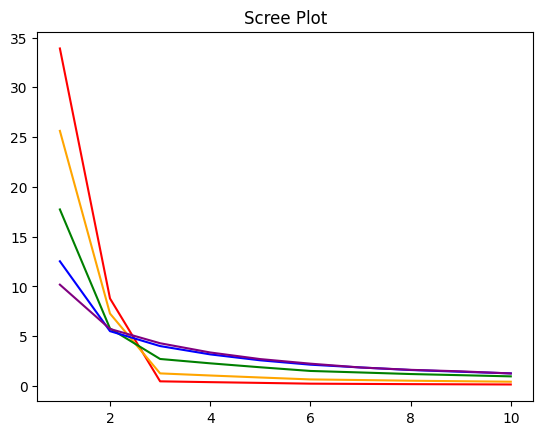

In [24]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

X = df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, color = "red").set_title('Scree Plot') # Create scree plot

X = df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, color = "orange").set_title('Scree Plot') # Create scree plot

X = df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, color = "green").set_title('Scree Plot') # Create scree plot

X = df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, color = "blue").set_title('Scree Plot') # Create scree plot

X = df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, color = "purple").set_title('Scree Plot') # Create scree plot




As the noice increased, it appears that the "elbow" became less distinctive. In the noise = 0.0125 it appears to have a very distinct elbow, but as the noice increased to 2 it clearly flattened. Though, it appears all of the datasets would be most efficient at k=2 it is clearer to see in the datasets with less noise. This is due to the distinct point of where the slope changes dramatically meaning adding components will not improve its variance.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

Increasing the number of clusters only improves the fit of a model to a certain point due to it explaining the variance of a data set, at a certain point though this leads to over-fitting the data. This point is represented in the elbow of the graph showing that adding components leads to diminshing returns in the explanation of variance.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [25]:
df = pd.read_csv('/content/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [26]:
df = pd.read_csv('/content/airbnb_hw.csv')
df = df.loc[:,['Review Scores Rating', 'Price', 'Beds', 'Number Of Reviews']]
df.head()
print(df.describe())

df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric( df['Price'], errors='coerce')

print(df.describe())
print(df.dtypes)

df = df.rename(columns={'Price':'price','Beds':'beds','Review Scores Rating':'rating', 'Number Of Reviews': 'number of reviews'})
df = df.dropna(axis=0,how='any')

       Review Scores Rating          Beds  Number Of Reviews
count          22155.000000  30393.000000       30478.000000
mean              91.993230      1.530089          12.018735
std                8.850373      1.015359          21.980703
min               20.000000      0.000000           0.000000
25%               89.000000      1.000000           0.000000
50%               94.000000      1.000000           3.000000
75%              100.000000      2.000000          13.000000
max              100.000000     16.000000         257.000000
       Review Scores Rating         Price          Beds  Number Of Reviews
count          22155.000000  30478.000000  30393.000000       30478.000000
mean              91.993230    163.589737      1.530089          12.018735
std                8.850373    197.785454      1.015359          21.980703
min               20.000000     10.000000      0.000000           0.000000
25%               89.000000     80.000000      1.000000           0.000000
5

2. Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

In [27]:
#Already removed nan's in cleaning
from sklearn.cluster import KMeans # Import kmc

# Max-min scaler function:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create normalizations and add to the dataframe
min_x1 = min(df.loc[:,'price']) # I'm putting these aside to rescale values later
max_x1 = max(df.loc[:,'price'])
min_x2 = min(df.loc[:,'beds'])
max_x2 = max(df.loc[:,'beds'])
min_x3 = min(df.loc[:,'rating'])
max_x3 = max(df.loc[:,'rating'])
min_x2 = min(df.loc[:,'number of reviews'])
max_x2 = max(df.loc[:,'number of reviews'])

# Preprocess the data for scikit:
X = df.loc[ : , ['price','beds', 'rating', 'number of reviews'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()

,price,beds,rating,number of reviews
4,0.053954,0.1875,0.950,0.148438
5,0.013914,0.0625,1.000,0.011719
6,0.024024,0.0625,1.000,0.031250
7,0.008008,0.0625,0.925,0.308594
8,0.026026,0.1250,0.875,0.367188


3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6

<Axes: title={'center': 'k=6'}, xlabel='price', ylabel='beds'>

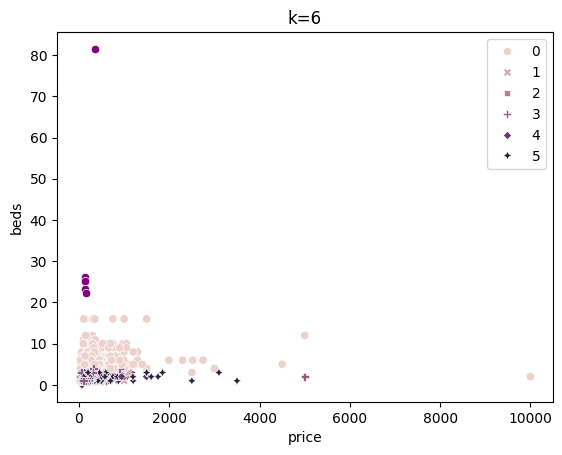

In [28]:
model = KMeans(n_clusters=6,random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df['g_hat'] = model.predict(X) # Predict values

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=df,x='price',y='beds',
                            hue='g_hat',style='g_hat').set_title('k=6')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='purple')

<Axes: title={'center': 'k=6'}, xlabel='price', ylabel='number of reviews'>

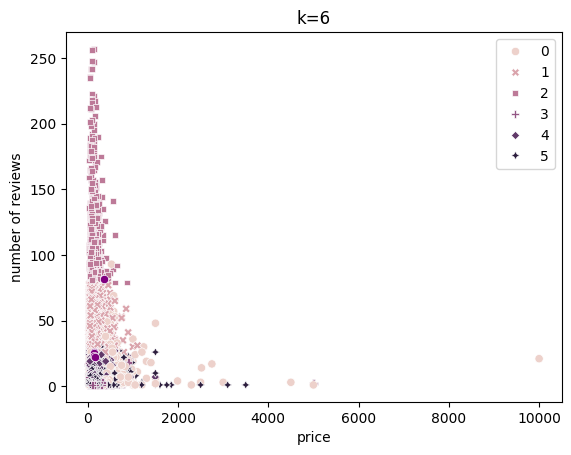

In [29]:
model = KMeans(n_clusters=6,random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df['g_hat'] = model.predict(X) # Predict values

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=df,x='price',y='number of reviews',
                            hue='g_hat',style='g_hat').set_title('k=6')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='purple')

<Axes: title={'center': 'k=6'}, xlabel='price', ylabel='rating'>

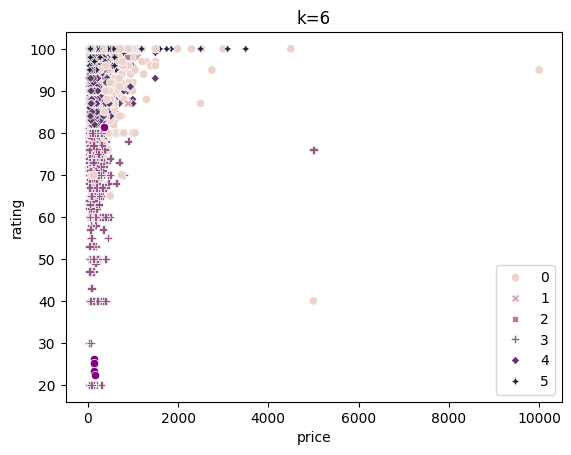

In [30]:
model = KMeans(n_clusters=6,random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df['g_hat'] = model.predict(X) # Predict values

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=df,x='price',y='rating',
                            hue='g_hat',style='g_hat').set_title('k=6')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='purple')

4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

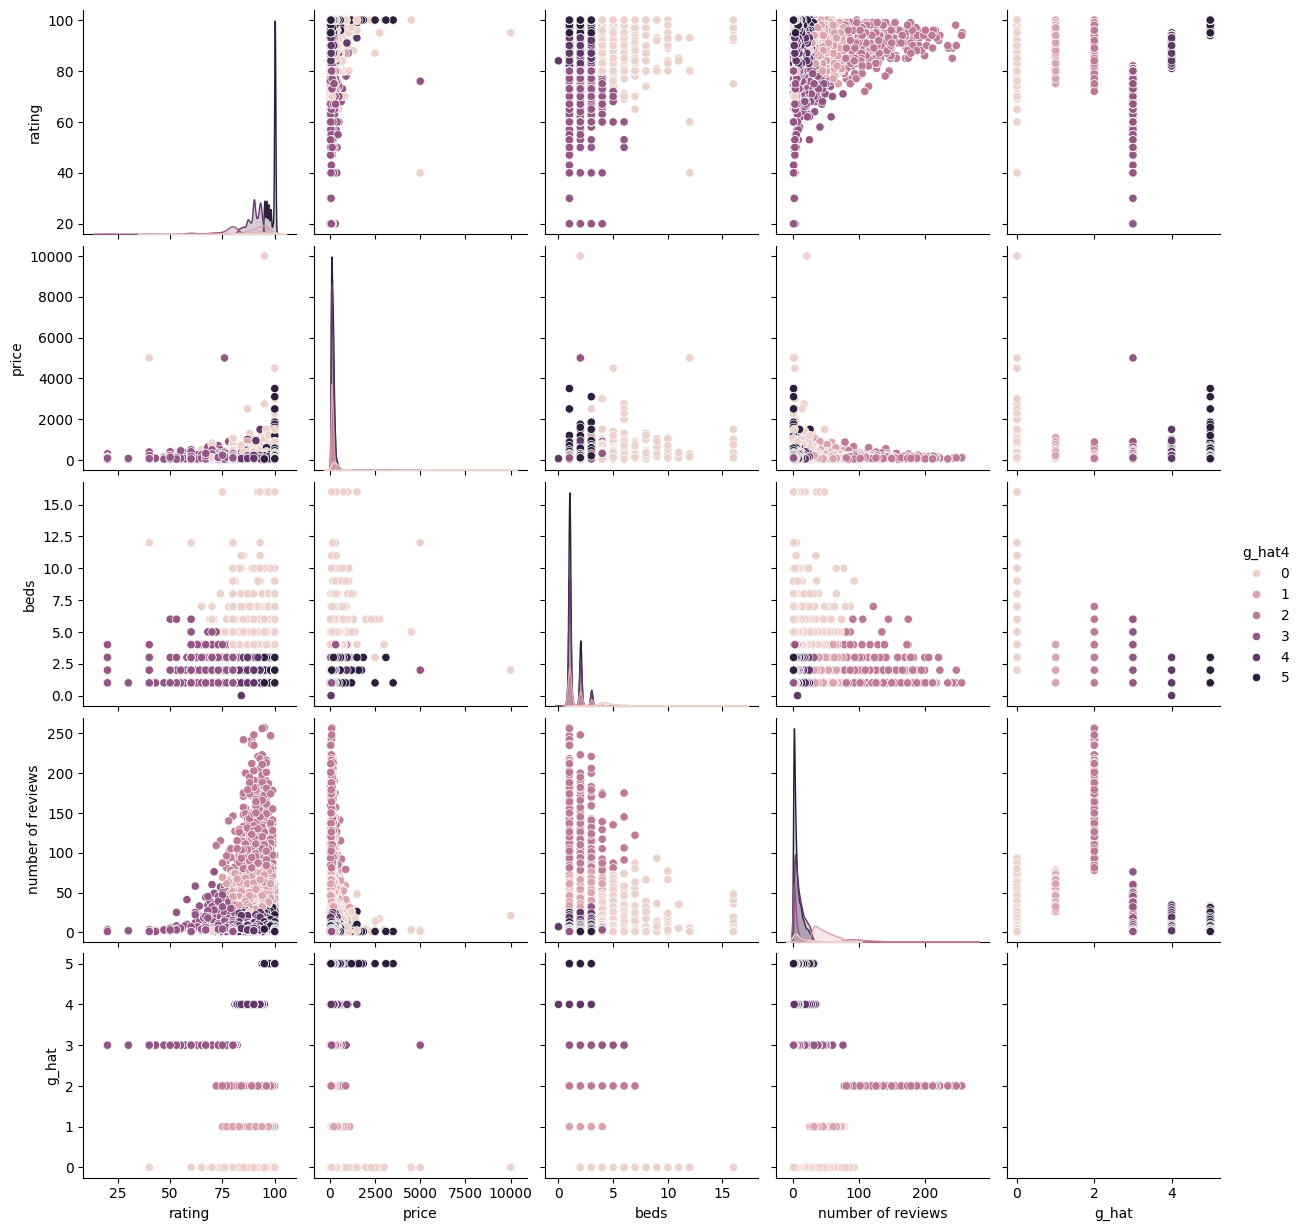

In [31]:
model = KMeans(n_clusters=6, random_state=0)
model = model.fit(X)
df['g_hat4'] = model.predict(X)
sns.pairplot(df, hue='g_hat4')

5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

In [32]:
cluster_summary = df.groupby('g_hat4')['price'].describe()
print(cluster_summary)

         count        mean         std   min    25%    50%    75%      max
g_hat4                                                                    
0        945.0  349.918519  468.652299  27.0  169.0  255.0  400.0  10000.0
1       2877.0  143.768509   89.814818  22.0   88.0  125.0  175.0   1100.0
2        761.0  132.787122   83.260684  27.0   80.0  109.0  165.0    875.0
3       2450.0  127.909388  129.232044  20.0   69.0  100.0  160.0   5000.0
4       6411.0  142.410700   88.458603  24.0   84.0  125.0  180.0   1495.0
5       8667.0  155.882658  119.566148  10.0   87.0  132.0  195.0   3500.0


0 has by far the highest rental prices, second highest is 5.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

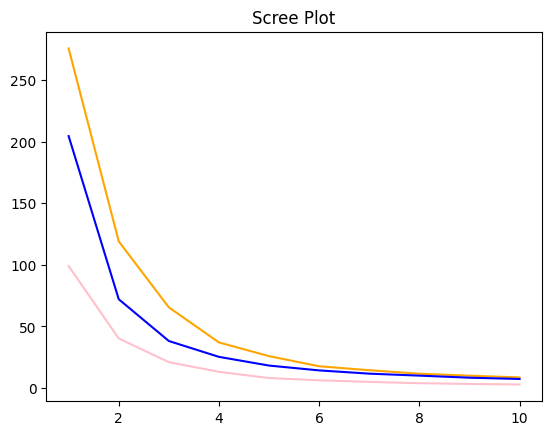

In [38]:
X = df.loc[ : , ['price','beds'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, color = "pink").set_title('Scree Plot') # Create scree plot

X = df.loc[ : , ['price','rating'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, color = "orange").set_title('Scree Plot') # Create scree plot

X = df.loc[ : , ['price','number of reviews'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, color = "blue").set_title('Scree Plot') # Create scree plot

The number of clusters should be 2!

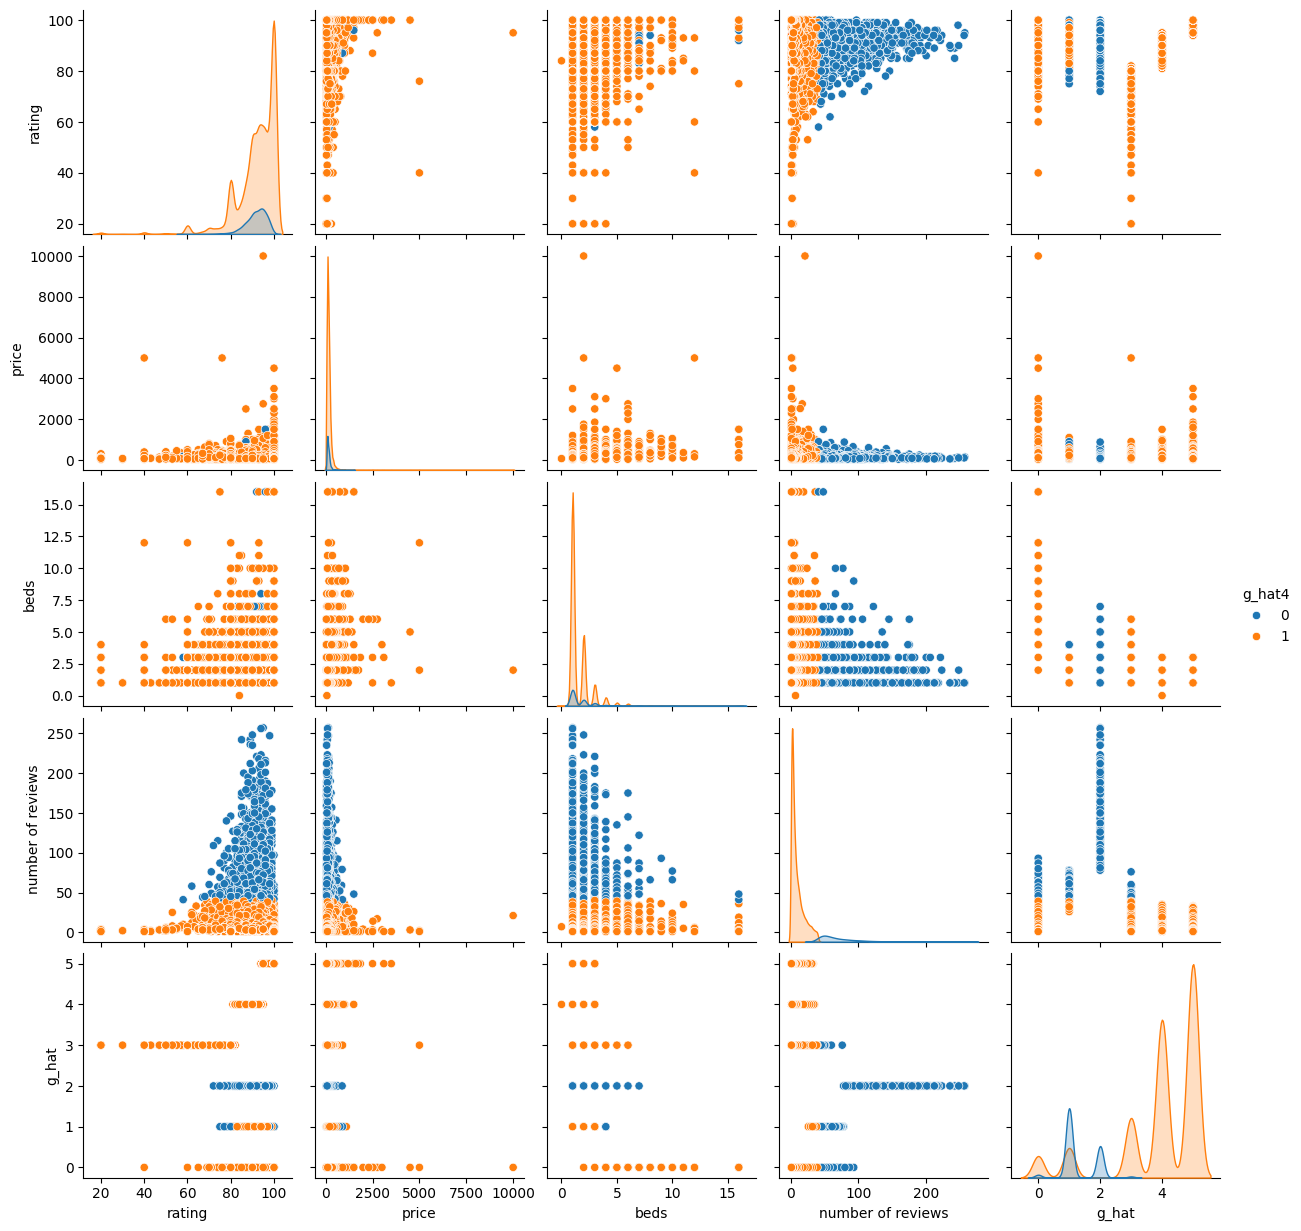

In [39]:
model = KMeans(n_clusters=2, random_state=0)
model = model.fit(X)
df['g_hat4'] = model.predict(X)
sns.pairplot(df, hue='g_hat4')

In [40]:
cluster_summary = df.groupby('g_hat4')['price'].describe()
print(cluster_summary)

          count        mean         std   min   25%    50%    75%      max
g_hat4                                                                    
0        2531.0  142.143026   92.965075  22.0  85.0  120.0  175.0   1500.0
1       19580.0  156.434627  154.588390  10.0  85.0  129.0  190.0  10000.0


**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?